# **Introduction to Deep Learning with Keras and TensorFlow**


Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database .

# About the dataset

MNIST is a collection of handwritten digits ranging from the number 0 to 9.

It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets.


##Importing necessary libraries

First, some modules needs to be loaded into the Python environment.

In [5]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation 
#The dropout layer ignores a set of neurons randomly).This normally is used to prevent the net from overfitting.
#The Dense layer is a normal fully connected layer in a neuronal network.
#An Activation Function decides whether a neuron should be activated or not

from keras.utils import np_utils                        
#np_utils. to_categorical is used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector

In [4]:
%matplotlib inline

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

Here,The MNIST data is split between 60,000 (28 x 28 pixel)
training images and 10,000 (28 x 28 pixel) images

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

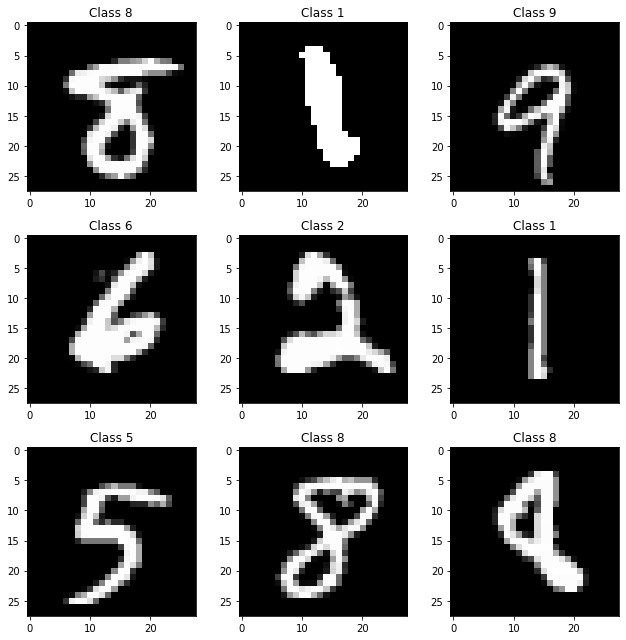

In [7]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):                     #selecting numbers between range of 9
    plt.subplot(3,3,i+1)               #making subplots of three rows and three columns by plotting numbers from range(9) and then incrementing
    num = random.randint(0, len(X_train)) #Return random integers from the traning set
    plt.imshow(X_train[num], cmap='gray', interpolation='none') #showing the plotted image
    plt.title("Class {}".format(y_train[num]))   #providing titles for each classes by formating it with predicted numbers
    
plt.tight_layout()                       #tight_layout automatically adjusts subplot params so that the subplots fits in to the figure area

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [8]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0   47  233  253  253   63    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0   11  155  233  252  252  252  144    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0   11  150  252  253  252  252  252  144    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0   73  252  252  253  168  252  252  144    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    1  109  232  252  252  206   93  252  252  144    0  

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.



## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

In [9]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape) #Printing the shape of the training and testing matrix
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

In [10]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a 3-layer fully connected network (FCN)



In [11]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

## The first hidden layer
The first hidden layer is a set of 512 nodes (artificial neurons).

Each node will receive an element from each input vector and apply some weight and bias to it.

In [12]:
model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

# Model activation

An "**activation**" is a non-linear function applied to the output of the layer above.

It checks the new value of the node, and decides whether that artifical neuron has fired.


**relu or Rectified Linear Unit (ReLU)** is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

Those inputs are then not considered to be fired.

Positive values of a node are unchanged.


In [13]:
model.add(Activation('relu')) 

In [14]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2)) #Dropout is the dropout rate 

## Adding the second hidden layer

The second hidden layer appears identical to our first layer.

However, instead of each of the 512-node receiving 784-inputs from the input image data,they receive 512 inputs from the output of the first 512-node layer.

In [15]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2)) #Dropout is the dropout rate 

## The Final Output Layer

The final layer of 10 neurons in fully-connected to the previous 512-node layer.

The final layer of a FCN should be equal to the number of desired classes (10 in this case).

In [16]:
model.add(Dense(10))

The "softmax" activation represents a probability distribution over K different possible outcomes.

Its values are all non-negative and sum to 1.

In [17]:
model.add(Activation('softmax'))

In [18]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## Compiling the model

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. 

**Loss function** — A way of measuring how far off predictions are from the desired outcome.

**Optimizer function** — A way of adjusting internal values in order to reduce the loss.

The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution.

The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

**Let's use the Adam optimizer for learning**

**Adam optimization** is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications.

**Categorical_crossentropy** is used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model!


The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces. We call the fit method to train a model in machine learning

In [21]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2489 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1000 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0719 - accuracy: 0.9776
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0558 - accuracy: 0.9823
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0454 - accuracy: 0.9854


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. 

## Evaluate Model's Accuracy on Test Data

evaluate() is for evaluating the already trained model using the validation (or test) data and the corresponding labels.

In [22]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])     #test score is the evaluation of the loss function for a given input.
print('Test accuracy:', score[1])  #test accuracy calculates how often predictions equal labels.

313/313 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9792
Test score: 0.07122843712568283
Test accuracy: 0.979200005531311


The test gave 97.9% accuracy

# Inspecting the output

It's always a good idea to inspect the output and make sure everything looks same.

The predict_classes function outputs the highest probability class
according to the trained classifier for each input example.

In [25]:
predicted_x = model.predict(X_test) #predicting the model on X_test
predicted_classes = np.argmax(predicted_x,axis=1) #argmax identifies the maximum value for every row

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 4ms/step


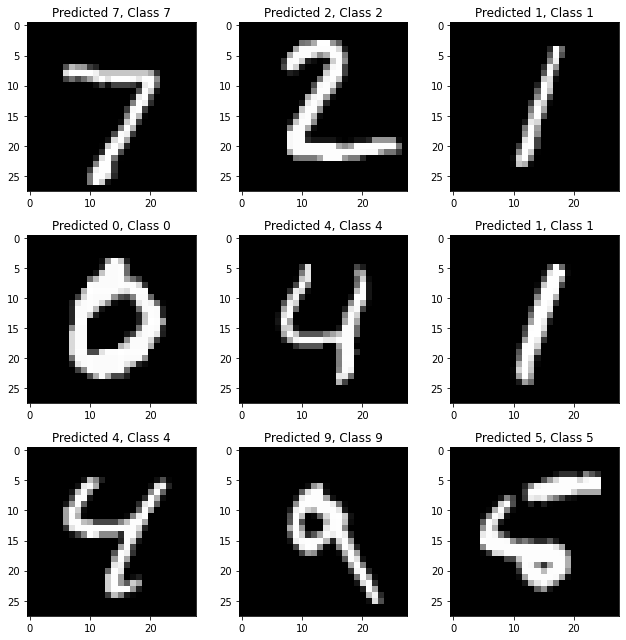

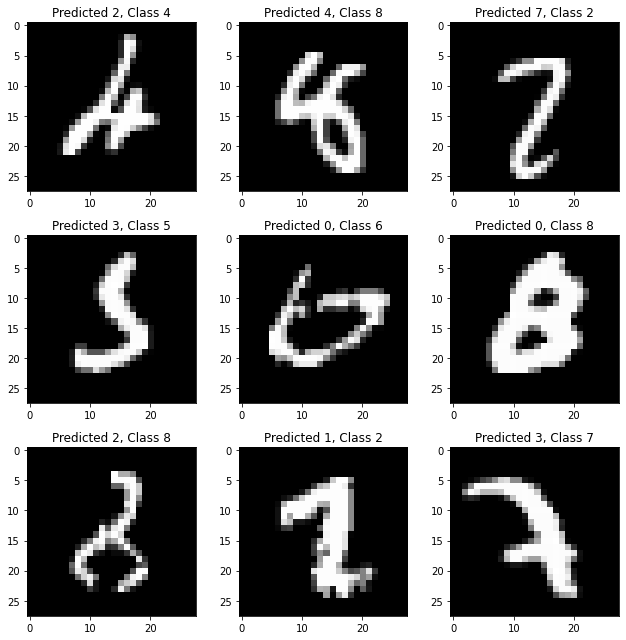

In [26]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]): #selecting numbers using enumerate method upto correct index 9
    plt.subplot(3,3,i+1)                           #making subplots of three rows and three columns by plotting numbers from range(9) and then incrementing
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')   #showing the plotted image
                                                                                    #Interpolation is a method for generating points between given points
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))   #providing titles for each classes by formating it with predicted correct classes
        
plt.tight_layout()                    #tight_layout automatically adjusts subplot params so that the subplots fits in to the figure area
    
 

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):  #selecting numbers using enumerate method upto incorrect index 9
    plt.subplot(3,3,i+1)                                #making subplots of three rows and three columns by plotting numbers from range(9) and then incrementing
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none') #showing the plotted image
                                                                                    #Interpolation is a method for generating points between given points
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))    #providing titles for each classes by formating it with predicted incorrect classes
    
plt.tight_layout()          #tight_layout automatically adjusts subplot params so that the subplots fits in to the figure area

# Trying experimenting with the batch size!

#### How does increasing the batch size to 10,000 affect the training time and test accuracy?
we can recover the lost test accuracy from a larger batch size by increasing the learning rate

#### How about a batch size of 32?
The batch size affects some indicators such as overall training time, training time per epoch, quality of the model, and similar. Usually, we chose the batch size as a power of two, in the range between 16 and 512. But generally, the size of 32 is a rule of thumb and a good initial choice.

A batch size of 32 means that 32 samples from the training dataset will be used to estimate the error gradient before the model weights are updated.

# Introducing Convolution!

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.


## Building a "Deep" Convolutional Neural Network

# Importing some additonal libraries

**Keras ImageDataGenerator** is used for getting the input of the original data and further, it makes the transformation of this data on a random basis and gives the output resultant containing only the data that is newly transformed.

**Keras Conv2D** is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

**The keras maxpooling2d** uses the class name as maxpool2d and it will use the tf keras layers, maxpooling2d class. It contains the integer or 2 integer's tuples factors which is used to downscale the spatial dimension. It contains the max pooling operation into the 2D spatial data.

**Zero-padding** layer for 2D input. This layer can add rows and columns of zeros at the top, bottom, left and right side of an image tensor.

**GlobalAveragePooling2d()** function is used for applying global average pooling operation for spatial data.

**Flatten** is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4)

**Batch normalization** applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1. Importantly, batch normalization works differently during training and during inference.

In [31]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

# Loading Training Data

In [32]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Formatting the input data layer

In [33]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [34]:
# one-hot format classes

nb_classes = 10 # number of unique digits

#np_utils. to_categorical is used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a Sequential Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. 

In [35]:
model = Sequential()                                 # Linear stacking of layers

In Keras, we can add the required types of layers through the add() method.

In [ ]:
# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

In [ ]:
# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

In [ ]:
# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

In [ ]:
# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

In [ ]:
# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

In [ ]:
# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [36]:
model.summary()     #getting the model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

# Compiling the model

In [37]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
#Data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

We can then feed our augmented data in batches

Besides loss function considerations as before, this method actually results in significant memory savings because we are actually LOADING the data into the network in batches before processing each batch before the data was all loaded into memory, but then processed in batches.

# Training the model

In [39]:

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

We can now train our model which is fed data by our batch loader

Steps per epoch should always be total size of the set divided by the batch size

SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

**steps_per_epoch**: Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch.

The **epochs** argument specifies how many times this cycle should be run.

The **verbose** argument controls how much output the method produces. We call the fit method to train a model in machine learning

**validation_data**: Data on which to evaluate the loss and any model metrics at the end of each epoch.

**Validation steps** -Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

# Fitting the model

In [40]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


468/468 [==============================] - 212s 451ms/step - loss: 0.1354 - accuracy: 0.9580 - val_loss: 0.0696 - val_accuracy: 0.9794
Epoch 2/5
468/468 [==============================] - 214s 457ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0460 - val_accuracy: 0.9848
Epoch 3/5
468/468 [==============================] - 213s 455ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 4/5
468/468 [==============================] - 213s 455ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0240 - val_accuracy: 0.9926
Epoch 5/5
468/468 [==============================] - 236s 503ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0208 - val_accuracy: 0.9932


# Evaluating model accuracy

In [41]:
score = model.evaluate(X_test, Y_test) #evaluate() is for evaluating the already trained model using the validation (or test) data and the corresponding labels.
print('Test score:', score[0])           #test score is the evaluation of the loss function for a given input.
print('Test accuracy:', score[1])        #test accuracy calculates how often predictions equal labels.

313/313 [==============================] - 10s 31ms/step - loss: 0.0208 - accuracy: 0.9932
Test score: 0.02076662704348564
Test accuracy: 0.9932000041007996


Finally, the model gives a accuracy of **99%**